# ATV2 - Mineração de Dados

Tarefa a ser realizada:

a) Agrupar por nome do produto e somar as quantidades vendidas, ordenando os produtos pela quantidade de vendas em ordem decrescente, exibindo os mais vendidos primeiro.

b) Gere um gráfico de barras mostrando os produtos mais vendidos

c) Calcular a receita gerada por cada produto, agrupando por nome do produto e somando as receitas, ordene a exibição dos produtos por ordem decrescente começando pela receita maior e terminando com a receita menor.

In [21]:
import os

db_path = './db'

if not os.path.exists(db_path):
    os.makedirs(db_path)

In [22]:
import random
import pandas as pd
from datetime import datetime, timedelta

# Lista de produtos para gerar o nome e id do produto
produtos = [
    (101, "Produto A"),
    (102, "Produto B"),
    (103, "Produto C"),
    (104, "Produto D"),
    (105, "Produto E")
]

# Função para gerar uma data aleatória
def gerar_data_inicial():
    # Define a data inicial (1º de novembro de 2024)
    data_inicial = datetime(2024, 11, 1)
    # Gera uma data aleatória dentro de um intervalo de 30 dias
    data_aleatoria = data_inicial + timedelta(days=random.randint(0, 30))
    return data_aleatoria.strftime('%Y-%m-%d')

# Função para gerar um conjunto de vendas
def gerar_vendas(num_vendas):
    vendas = []
    for id_venda in range(1, num_vendas + 1):
        id_produto, nome_produto = random.choice(produtos)
        quantidade = random.randint(1, 10)  # Quantidade aleatória entre 1 e 10
        preco_unitario = round(random.uniform(5.0, 100.0), 2)  # Preço aleatório entre 5 e 100 reais
        data_venda = gerar_data_inicial()  # Data aleatória no intervalo especificado
        vendas.append([id_venda, id_produto, nome_produto, quantidade, preco_unitario, data_venda])
    return vendas

# Gerar 5000 registros
num_vendas = 5000
vendas = gerar_vendas(num_vendas)

# Criar um DataFrame com os dados gerados
df_vendas = pd.DataFrame(vendas, columns=["id_venda", "id_produto", "nome_produto", "quantidade", "preco_unitario", "data_venda"])

# Salvar o DataFrame como um arquivo CSV
df_vendas.to_csv("./db/vendas_5000_registros.csv", index=False)

print("Arquivo CSV com 5000 registros gerados com sucesso!")

Arquivo CSV com 5000 registros gerados com sucesso!


# Tarefa

In [23]:
import pandas as pd

df_vendas = pd.read_csv('./db/vendas_5000_registros.csv')

a) Agrupar por nome do produto e somar as quantidades vendidas, ordenando os produtos pela quantidade de vendas em ordem decrescente, exibindo os mais vendidos primeiro.

In [24]:
df_agrupado = df_vendas.groupby('nome_produto')['quantidade'].sum().reset_index()
df_agrupado_sorted = df_agrupado.sort_values(by='quantidade', ascending=False)

print(df_agrupado_sorted)

  nome_produto  quantidade
4    Produto E        5699
3    Produto D        5545
1    Produto B        5527
2    Produto C        5442
0    Produto A        5220


b) Gere um gráfico de barras mostrando os produtos mais vendidos

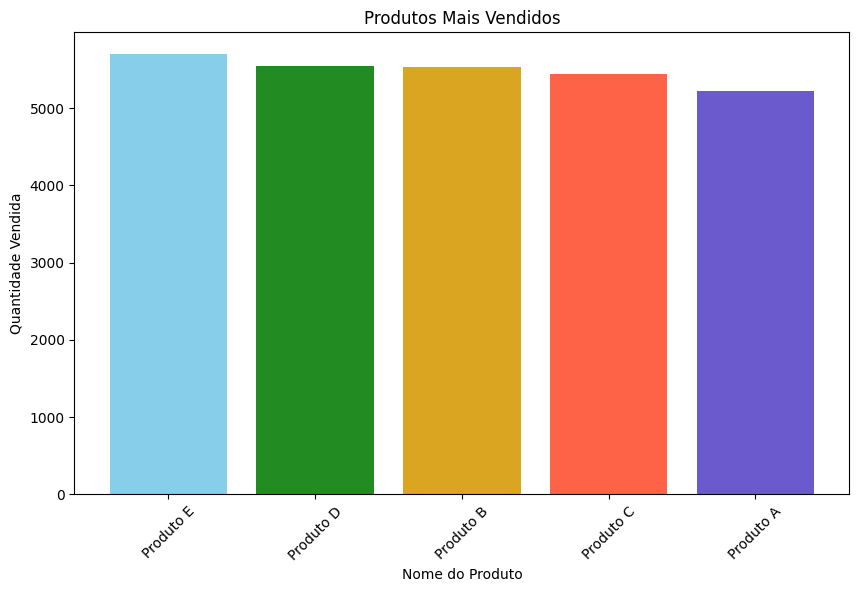

In [25]:
import matplotlib.pyplot as plt

colors = ['#87CEEB', '#228B22', '#DAA520', '#FF6347', '#6A5ACD']

plt.figure(figsize=(10, 6))
plt.bar(df_agrupado_sorted['nome_produto'], df_agrupado_sorted['quantidade'], color=colors)
plt.xlabel('Nome do Produto')
plt.ylabel('Quantidade Vendida')
plt.title('Produtos Mais Vendidos')
plt.xticks(rotation=45)
plt.show()

c) Calcular a receita gerada por cada produto, agrupando por nome do produto e somando as receitas, ordene a exibição dos produtos por ordem decrescente começando pela receita maior e terminando com a receita menor.

In [26]:
# Calcular a receita para cada venda e adicionála ao df_vendas
df_vendas['receita'] = df_vendas['quantidade'] * df_vendas['preco_unitario']

# Agrupar por nome do produto e somar as receitas
df_receita = df_vendas.groupby('nome_produto')['receita'].sum().reset_index()

# Exibir o DataFrame ordenado por receita
df_receita = df_receita.sort_values(by='receita', ascending=False)
print(df_receita)

  nome_produto    receita
4    Produto E  290381.19
3    Produto D  289784.08
2    Produto C  286213.48
0    Produto A  285102.91
1    Produto B  283728.79
